# Dataset Visualization

### Importing Data

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('../data/processed_data/cleaned_df.csv')
df['date'] = pd.to_datetime(df['date'])

In [81]:
df.head()

,customer_id,date,quantity,price
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


### Feature Engineering

In [3]:
df['total_sales'] = df['quantity'] * df['price']

### Revenue Contribution by Top Customers

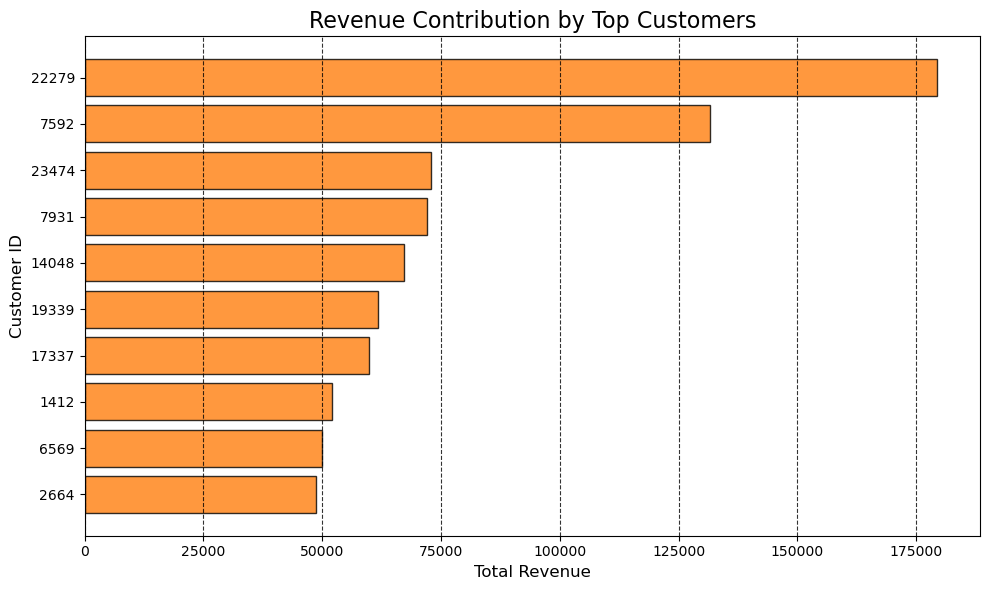

In [ ]:
top_10_customers = df.groupby('customer_id')['total_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6), edgecolor='grey')
plt.barh(top_10_customers.index.astype(str), top_10_customers.values, color='C1', edgecolor='black', alpha=0.8)
plt.title('Revenue Contribution by Top Customers', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.gca().invert_yaxis()  # Highest value at the top
plt.grid(axis='x', linestyle='--', alpha=0.8, color='k')
plt.tight_layout()
plt.savefig('../visuals/revenue_contribution_by_top_10_customers.png')

### Monthly Revenue Trends

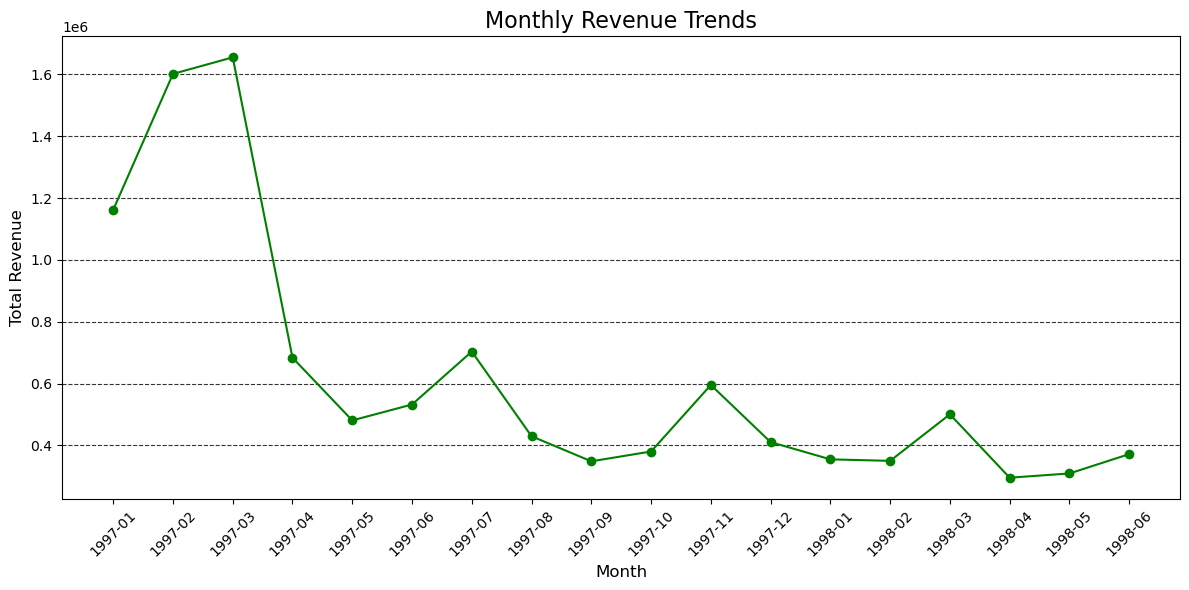

In [20]:
df['month'] = df['date'].dt.to_period('M')  
monthly_revenue = df.groupby('month')['total_sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values, marker='o', color='green')
plt.title('Monthly Revenue Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8, color='k')
plt.tight_layout()
plt.savefig('../visuals/monthly_revenue_trends.png')

### Average Order Value Distribution

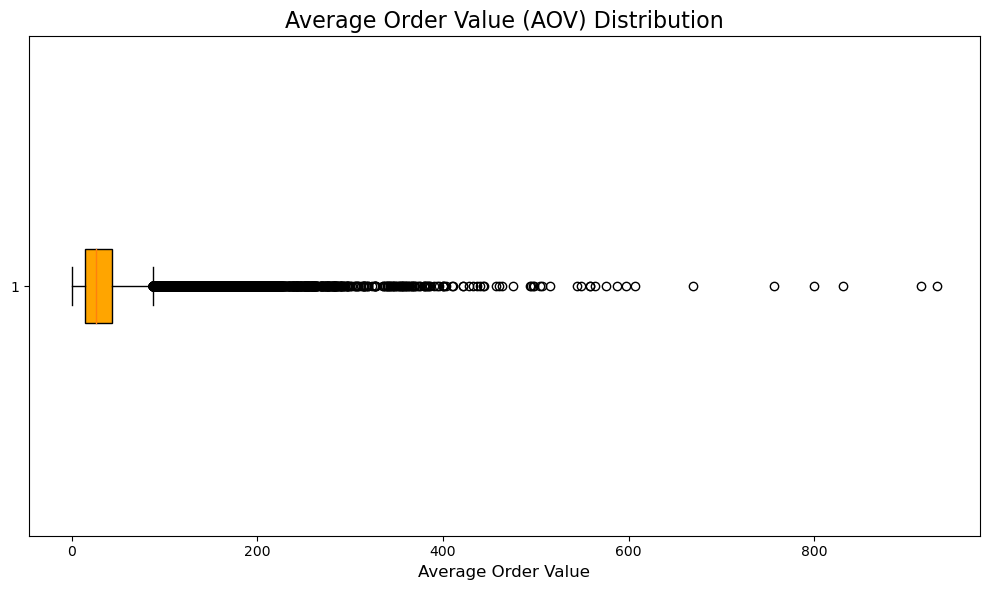

In [ ]:
df['aov'] = df['total_sales'] / df['quantity']

plt.figure(figsize=(10, 6))
plt.boxplot(df['aov'], vert=False, patch_artist=True, boxprops=dict(facecolor='orange', color='black'))
plt.title('Average Order Value (AOV) Distribution', fontsize=16)
plt.xlabel('Average Order Value', fontsize=12)
plt.tight_layout()


### Order Frequency Analysis

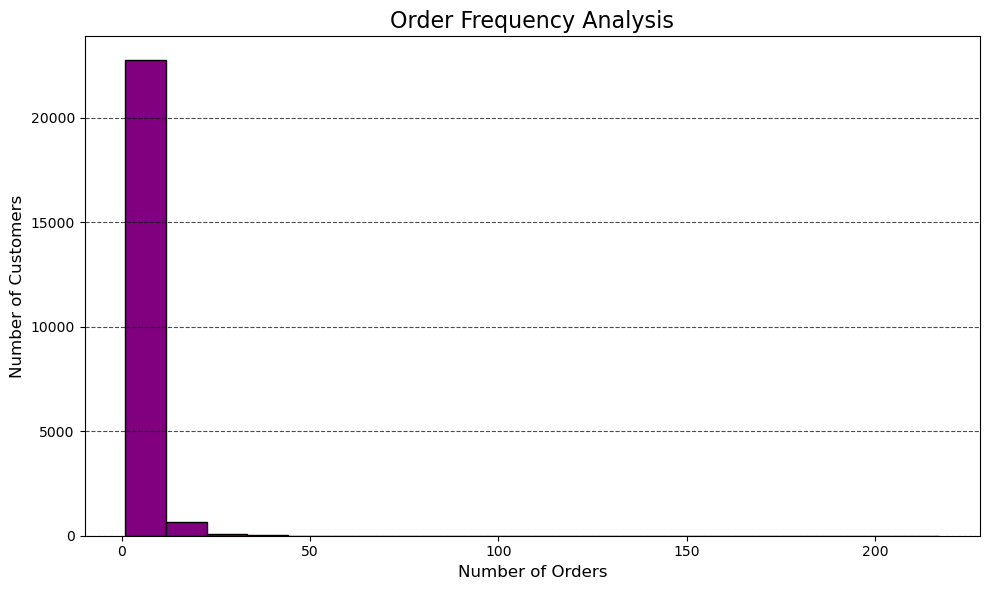

In [26]:
order_frequency = df['customer_id'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(order_frequency, bins=20, color='purple', edgecolor='black')
plt.title('Order Frequency Analysis', fontsize=16)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7, color='black')
plt.tight_layout()
plt.savefig('../visuals/order_frequency_analysis.png')

### Revenue By Product Price

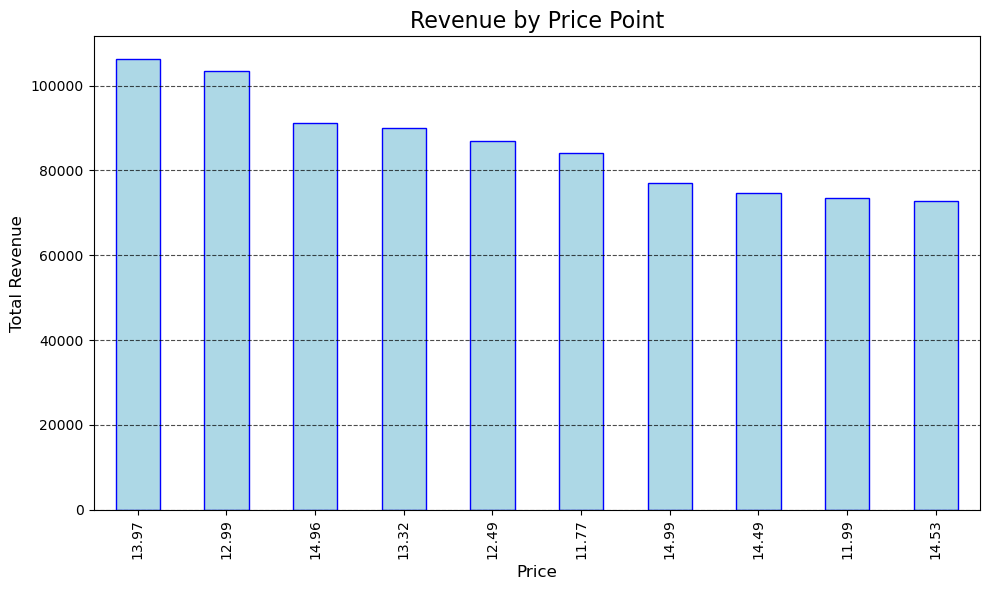

In [33]:
df['price_per_product'] = (df['price'] / df['quantity']).round(2)
revenue_by_price_point = df.groupby('price_per_product')['total_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
revenue_by_price_point.plot(kind='bar', color='lightblue', edgecolor='blue')
plt.title('Revenue by Price Point', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7, color='k')
plt.tight_layout()
plt.savefig('../visuals/revenue_by_product_price.png')